Sum of Square Errors =  0.00044779140153289207
a =  [-8.43471265]
b =  [16.61850293]
c =  [-3.97124164]
Original output (Y) =  [0 1 1 0]
logistic regression outputs (y) =  [0.01850222 0.98540676 0.98540676 0.01128386]
time elapsed =  2.3185875415802  seconds


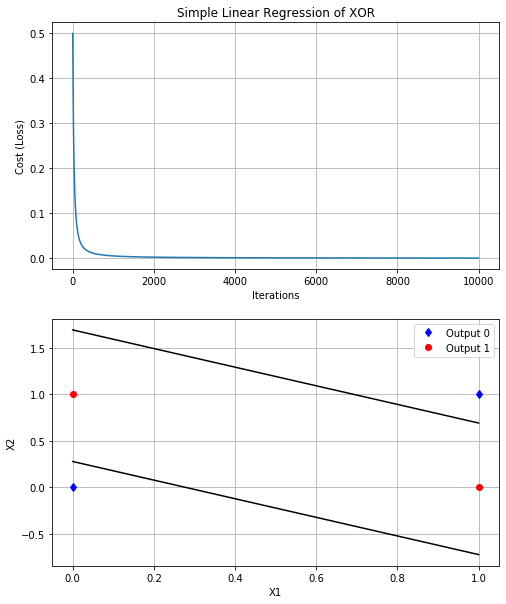

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

st = time()
X1 = np.array([[0, 0, 1, 1]])

X2 = np.array([[0, 1, 0, 1]])

Y  = np.array([[0, 1, 1, 0]])

dataset_len = Y.size
nety  = np.zeros((1, dataset_len))
y     = np.zeros((1, dataset_len)) 
a     = np.zeros((1, 1))
b     = np.zeros((1, 1))
c     = np.zeros((1, 1))
se    = np.zeros((1, dataset_len))
de    = np.zeros((1, dataset_len))
epoch = 10000
n     = 5 # learning rate 
# N.B. good learning rate is .1, .01, .001 etc but 5 is not a good learning rate. 
# 5 is used as it is ok for 2 bit xor problem.
it   = []
cost = []

def sig(y):
    return 1/(1+np.exp(-y))

def dsig(y):
    return y * (1-y)

def feed_forward():
    global X1, X2, nety, y, a, b, c, se, de
    nety = a * (X1+X2)**2 + b * (X1+X2) + c
    y    = sig(nety)
    se   = 0.5 * (y - Y)**2
    cost.append(np.sum(se)/len(se))
    de   = (y - Y)
    return 0

def backpropagation():
    global X1, X2, y, a, b, c, de, n

    #backpropagation
    #gradient descent calculation
    grada = np.zeros((1, 1))
    grada = np.sum(de * y*(1-y) * (X1+X2)**2) / dataset_len

    gradb = np.zeros((1, 1))
    gradb = np.sum(de * y*(1-y) * (X1+X2)) / dataset_len

    gradc = np.zeros((1, 1))
    gradc = np.sum(de * y*(1-y)) / dataset_len

    #update
    a -= n * grada
    b -= n * gradb
    c -= n * gradc

def main():
    for i in range(epoch):
        feed_forward()
        it.append(i)
        backpropagation()

main()

print('Sum of Square Errors = ', np.sum(se)/len(se))
print('a = ', *a)
print('b = ', *b)
print('c = ', *c)
print('Original output (Y) = ', *Y)
print('logistic regression outputs (y) = ', *y)
print('time elapsed = ', time()-st, ' seconds')

#graph plot
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 10)

plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(it, cost)
plt.grid(True) 
plt.title('Simple Linear Regression of XOR')
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')

plt.subplot(2, 1, 2)
grp0x  = X1[Y == 0]
grp0y  = X2[Y == 0]
plt.plot(grp0x, grp0y, 'bd')

grp1x = X1[Y == 1]
grp1y = X2[Y == 1]
plt.plot(grp1x, grp1y, 'ro')
plt.legend(["Output 0", "Output 1"])

tmpx = X1.reshape(dataset_len)
# decision/boundary line plot
tmpy = ((-(2*a*X1+b) + np.sqrt((2*a*X1+b)**2 - 4*a*(a*tmpx**2+b*tmpx+c)))\
        / (2*a)).reshape(dataset_len)
plt.plot(tmpx, tmpy, 'k-')

tmpy = ((-(2*a*X1+b) - np.sqrt((2*a*X1+b)**2 - 4*a*(a*tmpx**2+b*tmpx+c)))\
        / (2*a)).reshape(dataset_len)
plt.plot(tmpx, tmpy, 'k-')
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()
